In [1]:
#!pip install opencv-python
#!pip install opencv-contrib-python

In [2]:
# !pip install scipy

In [3]:
import math
import cv2 as cv
import matplotlib.pyplot as plt

def show_img(img):
    plt.figure(figsize=(15, 10))
    plt.axis('off')
    plt.imshow(img)

    plt.show()

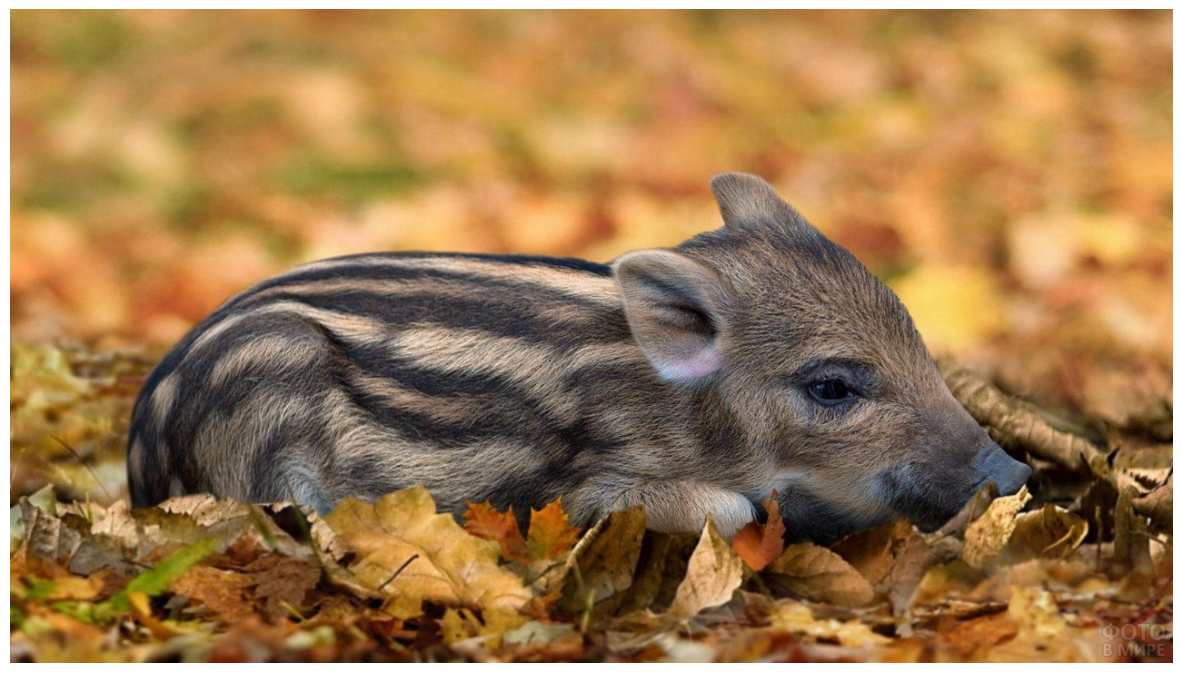

In [4]:
img1 = cv.imread("kaban1.jpg")
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
show_img(img1)

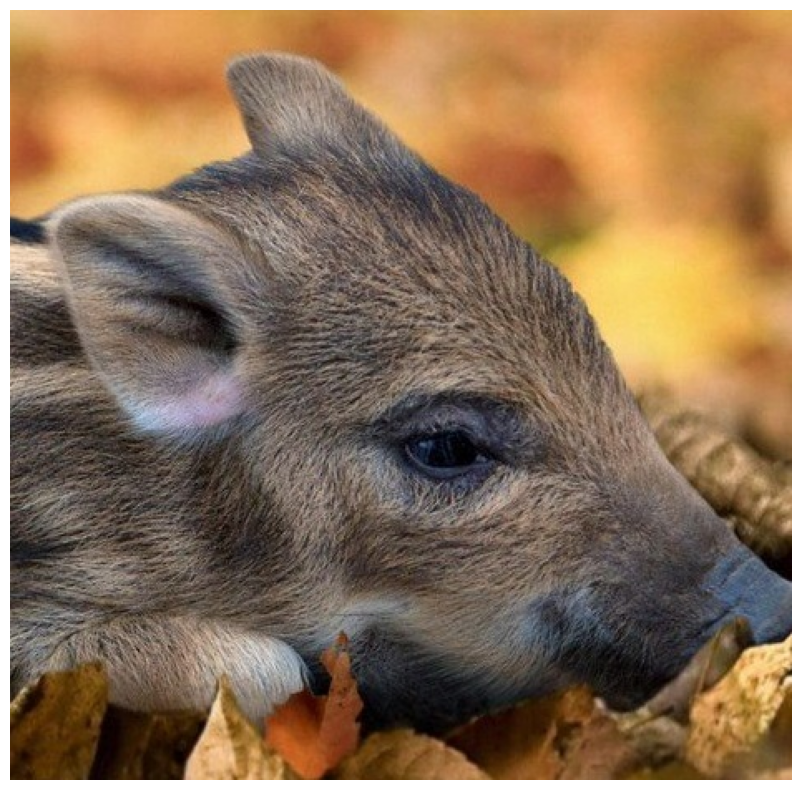

In [5]:
img2 = cv.imread("kaban2.jpg")
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
show_img(img2)

In [6]:
from scipy.spatial.distance import cityblock

def own_matcher(img1, img2):
    sift = cv.xfeatures2d.SIFT_create()
    kp1, des1 = sift.detectAndCompute(img1,None)
    kp2, des2 = sift.detectAndCompute(img2,None)

    matches = []
    for i, d1 in enumerate(des1):
        for j, d2 in enumerate(des2):
            matches.append(cv.DMatch(_distance=float(cityblock(d1, d2)), _imgIdx=0, _queryIdx=i, _trainIdx=j))

    matches = sorted(matches, key=lambda x: x.distance)

    result = cv.drawMatches(img1, kp1, img2, kp2, matches[:15], None, matchColor=(0,255,0), matchesThickness=3, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    show_img(result)


In [7]:
def bf(img1, img2):
    sift = cv.xfeatures2d.SIFT_create()
    kp1, des1 = sift.detectAndCompute(img1,None)
    kp2, des2 = sift.detectAndCompute(img2,None)

    bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)
    
    matches = bf.match(des1, des2)

    matches = sorted(matches, key=lambda x: x.distance)

    result = cv.drawMatches(img1, kp1, img2, kp2, matches[:15], None, matchColor=(0,255,0), matchesThickness=3, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    show_img(result)

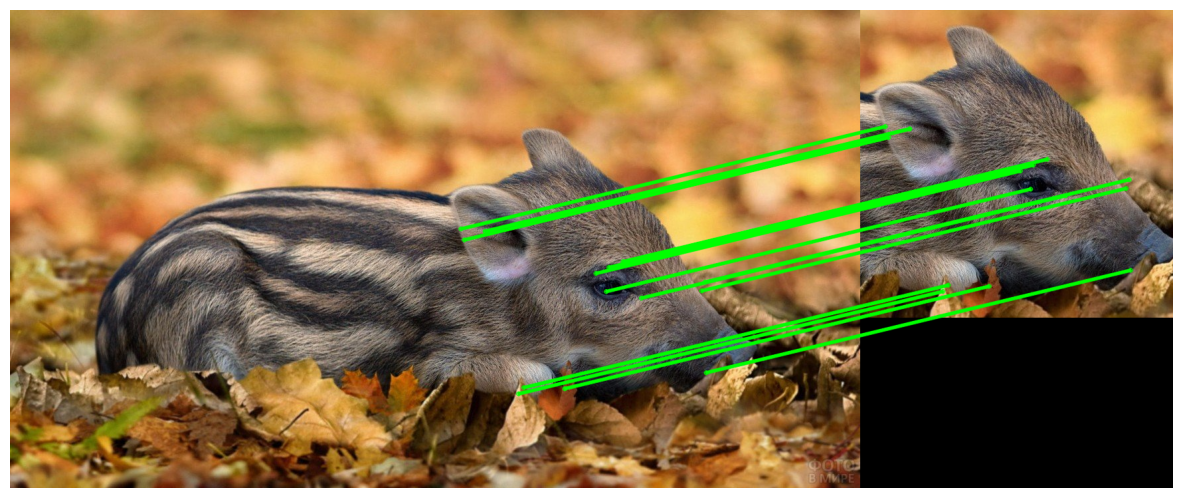

In [8]:
bf(img1,img2)

In [9]:
handmade(img1,img2)

NameError: name 'handmade' is not defined

In [ ]:
rotated_img_2 = cv.rotate(img2, cv.ROTATE_90_CLOCKWISE)

In [ ]:
library(img1,rotated_img_2)

In [ ]:
handmade(img1,rotated_img_2)